In [1]:
from sklearn.datasets import make_blobs
import pandas as pd

X, y = make_blobs(500, centers=4, random_state=42, cluster_std=1)

df = pd.DataFrame([X[:, 0], X[:, 1], y]).T
df.columns = ["x1", "x1", "label"]
df["label"] = df["label"].astype

C:\Users\MaxF�rsntr�m-AI23GBG\AppData\Local\Temp\ipykernel_18912\1412152391.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,0,1,2
0,-7.689054,6.620346,3.0
1,-9.576514,-6.934404,2.0
2,6.829682,1.164871,1.0
3,-2.901306,7.550771,0.0
4,-5.678413,-7.288185,2.0
...,...,...,...
495,-7.438972,8.248157,3.0
496,-2.586299,9.355438,0.0
497,-7.215412,-5.211088,2.0
498,-7.402350,-5.831100,2.0


Text(0.5, 1.0, 'original data')

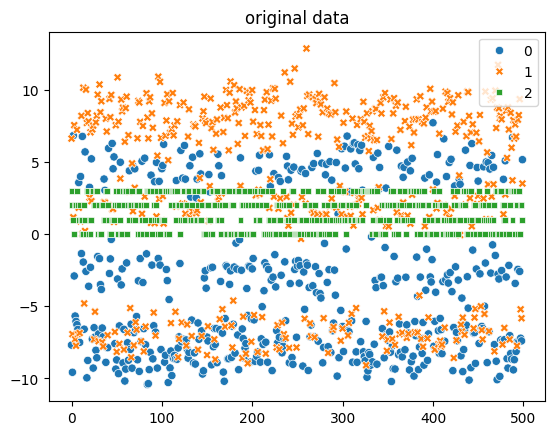

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, palette="tab10")
plt.title("original data")

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)


In [ ]:
sns.scatterplot(x=scaled_X[:, 0], y=scaled_X[:, 1])

In [ ]:
from sklearn.cluster import KMeans

clusters = range(1, 10)
sum_sqare_distance = [KMeans(k, n_init="auto").fit(scaled_X).inertia_ for k in clusters]

sum_sqare_distance

In [ ]:
plt.plot(clusters, sum_sqare_distance, "--o")
plt.xlabel("number of square distnaces")
plt.ylabel=("SSD")
plt.title("Elbow plot")

In [ ]:
from sklearn.metrics import silhouette_score

kmeans = [KMeans(k, n_init="auto").fit(scaled_X).inertia_ for k in clusters]

silhouette_scores = [silhouette_score(scaled_X, kmean.labels_) for kmean in kmeans[1:]]
plt.plot(clusters[1:], silhouette_scores, "--o")

In [ ]:
df_plot = pd.DataFrame(scaled_X, columns=["x1", "x2"])

fig, axes = plt.subplots(2, 4, figsize=(16, 10))

for i, ax in enumerate(axes.flatten()):
    cluster_centers = kmeans[i].cluster_centers_
    df_plot["label"] = kmeans[i].labels_

    sns.scattterplot(data=df, x="x1", y="x2", hue="label", ax=ax, palette="tab10")
    ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=200, marker="*", color="black")

